In [2]:
# Define the URLs for the sensor data
my_temp_data = 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_temperature'
my_hum_data = 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_relative_humidity'
my_lum_data = 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_luminance'
my_ultraviolet_data = 'http://192.168.1.102:8080/rest/items/ZWave_Node_005_Sensor_ultraviolet'
import requests
import time
import pandas as pd
import json
 # Create a new DataFrame to store the sensor data
my_values_df = pd.DataFrame(data=None, columns=['timestamp', 'temperature', 'humidity', 'luminace', 'ultraviolet'])
 # Get the current timestamp and retrieve the sensor data 10 times
for my_counter in range(10):
    # Wait for 10 seconds before retrieving the data again
    time.sleep(10)
    my_timestamp = round(time.time())
    print(my_timestamp)
     # Retrieve the sensor data from the URLs
    hum_data = requests.get(my_hum_data)
    temp_data = requests.get(my_temp_data)
    lum_data = requests.get(my_lum_data)
    ultraviolet_data = requests.get(my_ultraviolet_data)
     # Parse the JSON data
    hum = json.loads(hum_data.content)
    temp = json.loads(temp_data.content)
    lum = json.loads(lum_data.content)
    ultraviolet = json.loads(ultraviolet_data.content)
     # Extract the sensor values from the JSON data
    act_temp = temp['state']
    act_hum = hum['state']
    act_lum = lum['state']
    act_ultraviolet = ultraviolet['state']
     # Remove the unit from the temperature value
    act_temp = act_temp.replace('°C', '')
     # Print the sensor values
    print(act_hum)
    print(act_temp)
    print(act_lum)
    print(act_ultraviolet)
     # Add the sensor values to the DataFrame
    input_values = [my_timestamp, act_temp, act_hum, act_lum, act_ultraviolet]
    my_values_df.loc[my_counter] = input_values
 # Write the sensor data to a JSON file
filename = "a_sensor_values"
with open(filename, 'w+') as jsonfile:
    my_values_df.to_json(jsonfile)


1686297069
60
21.9 
1900
0
1686297079
60
21.9 
1900
0
1686297090
60
21.9 
1900
0
1686297100
60
21.9 
1900
0
1686297110
60
21.9 
1900
0
1686297121
60
21.9 
1900
0
1686297131
60
21.9 
1900
0
1686297142
60
21.9 
1922
0
1686297152
60
21.9 
1922
0
1686297162
60
21.9 
1922
0


In [3]:
import sqlite3
import requests
import json
import time
 # Define the name of the SQLite database
sqlite_db = 'a_sensor_values.db'
print(sqlite_db)
 # Connect to the database and create a cursor object
conn = sqlite3.connect(sqlite_db)
cur = conn.cursor()
 # Drop the table if it already exists and create a new table
cur.execute('''DROP TABLE IF EXISTS sensor_values''')
cur.execute('''CREATE TABLE sensor_values(timestamp NUMERIC, temperature NUMERIC, humidity NUMERIC, luminace NUMERIC, ultraviolet NUMERIC);''')
 # Loop through 10 iterations
for my_counter in range(10):
    # Wait for 10 seconds
    time.sleep(10)
     # Get the current timestamp
    my_timestamp = round(time.time())
    print(my_timestamp)
     # Get the sensor data from the API
    hum_data = requests.get(my_hum_data)
    temp_data = requests.get(my_temp_data)
    lum_data = requests.get(my_lum_data)
    ultraviolet_data = requests.get(my_ultraviolet_data)
     # Convert the API response to JSON format
    hum = json.loads(hum_data.content)
    temp = json.loads(temp_data.content)
    lum = json.loads(lum_data.content)
    ultraviolet = json.loads(ultraviolet_data.content)
     # Extract the sensor values from the JSON data
    act_temp = temp['state']
    act_hum = hum['state']
    act_lum = lum['state']
    act_ultraviolet = ultraviolet['state']
    # Remove the unit from the temperature value
    act_temp = act_temp.replace('°C', '')
     # Print the sensor values
    print(act_hum)
    print(act_temp)
    print(act_lum)
    print(act_ultraviolet)
     # Create an SQL query to insert the sensor values into the database
    execution_string = f"INSERT INTO sensor_values VALUES ({my_timestamp}, {act_temp}, {act_hum}, {act_lum}, {act_ultraviolet})"
    print(execution_string)
     # Execute the SQL query and commit the changes to the database
    cur.execute(execution_string)
    conn.commit()

a_sensor_values.db
1686297187
60
21.9 
1922
0
INSERT INTO sensor_values VALUES (1686297187, 21.9 , 60, 1922, 0)
1686297198
60
22 
1966
0
INSERT INTO sensor_values VALUES (1686297198, 22 , 60, 1966, 0)
1686297208
60
22 
1966
0
INSERT INTO sensor_values VALUES (1686297208, 22 , 60, 1966, 0)
1686297219
60
22 
1966
0
INSERT INTO sensor_values VALUES (1686297219, 22 , 60, 1966, 0)
1686297229
60
22 
1966
0
INSERT INTO sensor_values VALUES (1686297229, 22 , 60, 1966, 0)
1686297240
60
22 
1966
0
INSERT INTO sensor_values VALUES (1686297240, 22 , 60, 1966, 0)
1686297251
60
22 
1966
0
INSERT INTO sensor_values VALUES (1686297251, 22 , 60, 1966, 0)
1686297262
60
22 
1930
0
INSERT INTO sensor_values VALUES (1686297262, 22 , 60, 1930, 0)
1686297272
60
22 
1930
0
INSERT INTO sensor_values VALUES (1686297272, 22 , 60, 1930, 0)
1686297282
60
22 
1930
0
INSERT INTO sensor_values VALUES (1686297282, 22 , 60, 1930, 0)


timestamp      1.686297e+09
temperature    2.190000e+01
humidity       6.000000e+01
luminace       1.922000e+03
ultraviolet    0.000000e+00
Name: 0, dtype: float64
0:00:00
timestamp      1.686297e+09
temperature    2.200000e+01
humidity       6.000000e+01
luminace       1.966000e+03
ultraviolet    0.000000e+00
Name: 1, dtype: float64
0:00:11
timestamp      1.686297e+09
temperature    2.200000e+01
humidity       6.000000e+01
luminace       1.966000e+03
ultraviolet    0.000000e+00
Name: 2, dtype: float64
0:00:21
timestamp      1.686297e+09
temperature    2.200000e+01
humidity       6.000000e+01
luminace       1.966000e+03
ultraviolet    0.000000e+00
Name: 3, dtype: float64
0:00:32
timestamp      1.686297e+09
temperature    2.200000e+01
humidity       6.000000e+01
luminace       1.966000e+03
ultraviolet    0.000000e+00
Name: 4, dtype: float64
0:00:42
timestamp      1.686297e+09
temperature    2.200000e+01
humidity       6.000000e+01
luminace       1.966000e+03
ultraviolet    0.000000e+00


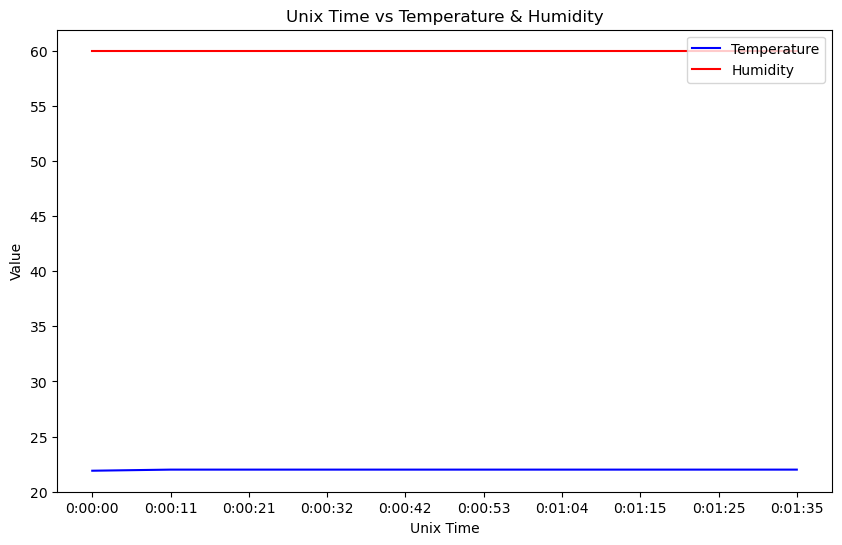

In [4]:
import matplotlib.pyplot as plt
import datetime
plot_df=pd.read_sql("SELECT * FROM sensor_values;", conn)

timestamps=[]
for i,row in plot_df.iterrows():
   print(row)
   first_time= plot_df.iloc[0]['timestamp']
   second_time= plot_df.iloc[i]['timestamp']  
   duration =  second_time - first_time
   calc_seconds=str(datetime.timedelta(seconds=duration))
   print(calc_seconds)
   timestamps.append(calc_seconds)


# Create the chart

plt.figure(figsize=(10, 6))
plt.plot(timestamps,plot_df['temperature'], 'b', label='Temperature')
plt.plot(timestamps,plot_df['humidity'], 'r', label='Humidity')

plt.xlabel('Unix Time')
plt.ylabel('Value')
plt.title('Unix Time vs Temperature & Humidity')
plt.legend(loc='upper right')

plt.show()